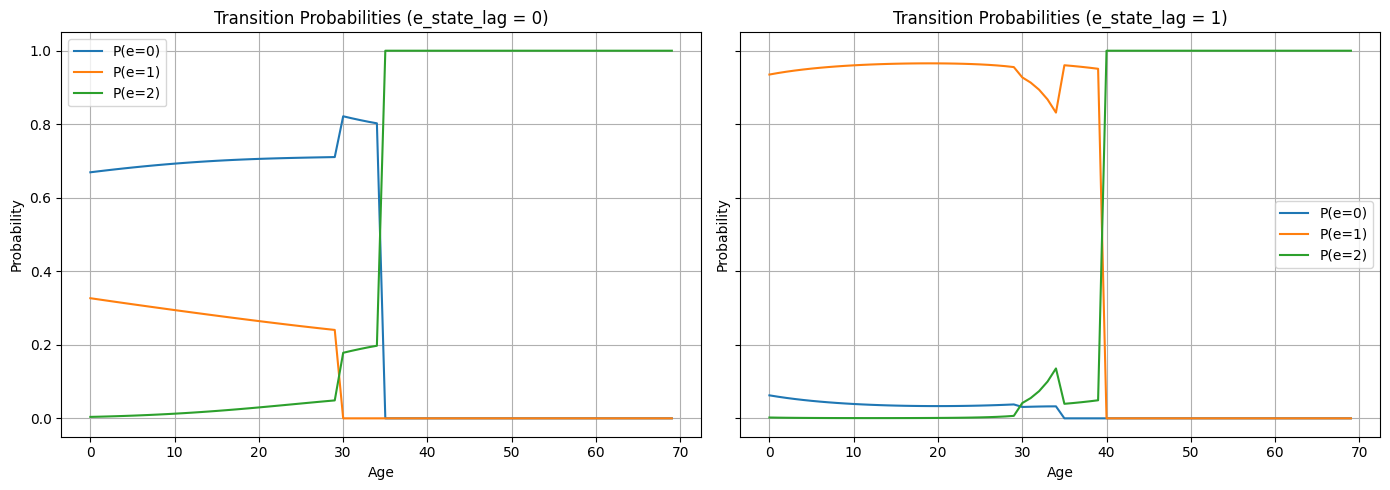

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

parameter_table = pd.read_csv("Data/transition_ssh_para.csv")[['Variable', 'Response', 'Estimate']]
parameter_table_with_control = pd.read_csv("Data/transitin_ssh_para_med_kontrol.csv")[['Variable', 'Response', 'Estimate']]

def compute_transition_probs(x, param_table):
    eta = {1: 0.0, 2: 0.0}
    for _, row in param_table.iterrows():
        var = row["Variable"]
        response = row["Response"]
        estimate = row["Estimate"]

        if var == "Intercept":
            eta[response] += estimate
        else:
            if var in x:
                eta[response] += estimate * x[var]
            elif "*" in var:
                terms = var.split("*")
                val = np.prod([x.get(t, 0) for t in terms])
                eta[response] += estimate * val

    exp_eta1 = np.exp(eta[1])
    exp_eta2 = np.exp(eta[2])
    denom = 1 + exp_eta1 + exp_eta2

    return {
        0: 1 / denom,
        1: exp_eta1 / denom,
        2: exp_eta2 / denom
    }

# Age range
age_end = 41
ages = np.arange(0, 70)

# DataFrame to collect results
results = []

# Compute for e_state_lag = 0 and 1
for e_state_lag in [0, 1]:
    for age in ages:
        x_input = {
            "e_state_lag": e_state_lag,
            "alder": age,
            "alder2": age**2,
            "dummy_60_65": int(age_end-11 <= age ),
            "alder*e_state_lag": age * e_state_lag,
            "alder2*e_state_lag": (age**2) * e_state_lag,
            "dummy_60_*e_state_la": int(age_end-11 <= age) * e_state_lag
        }
        # 👉 Force P(e=2) = 0 at age 35
        probs = compute_transition_probs(x_input, parameter_table)

        if e_state_lag == 0:
            if age >= 35:
                # Must go on early retirement
                probs[0] = 0.0
                probs[1] = 0.0
                probs[2] = 1.0
            elif age >= 30:
                # Cannot be hired
                probs[1] = 0.0
                total = probs[0] + probs[2]
                probs[0] /= total
                probs[2] /= total

        elif e_state_lag == 1:
            if age>= 40:
                probs[0] = 0.0
                probs[1] = 0.0
                probs[2] = 1.0
            elif age >= 35:
                # Move all P(e=1) mass to P(e=2)
                probs[2] = probs[0]
                probs[0] = 0.0
                total = probs[1] + probs[2]
                probs[1] /= total
                probs[2] /= total

        results.append({
            "age": age,
            "e_state_lag": e_state_lag,
            "P_0": probs[0],
            "P_1": probs[1],
            "P_2": probs[2]
        })


# Convert to DataFrame
df = pd.DataFrame(results)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
for lag, ax in zip([0, 1], axes):
    sub_df = df[df["e_state_lag"] == lag]
    ax.plot(sub_df["age"], sub_df["P_0"], label="P(e=0)")
    ax.plot(sub_df["age"], sub_df["P_1"], label="P(e=1)")
    ax.plot(sub_df["age"], sub_df["P_2"], label="P(e=2)")
    ax.set_title(f"Transition Probabilities (e_state_lag = {lag})")
    ax.set_xlabel("Age")
    ax.set_ylabel("Probability")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.savefig("andet/pictures/transition_probs.png")  # Or .jpg, .svg, etc.
plt.show()


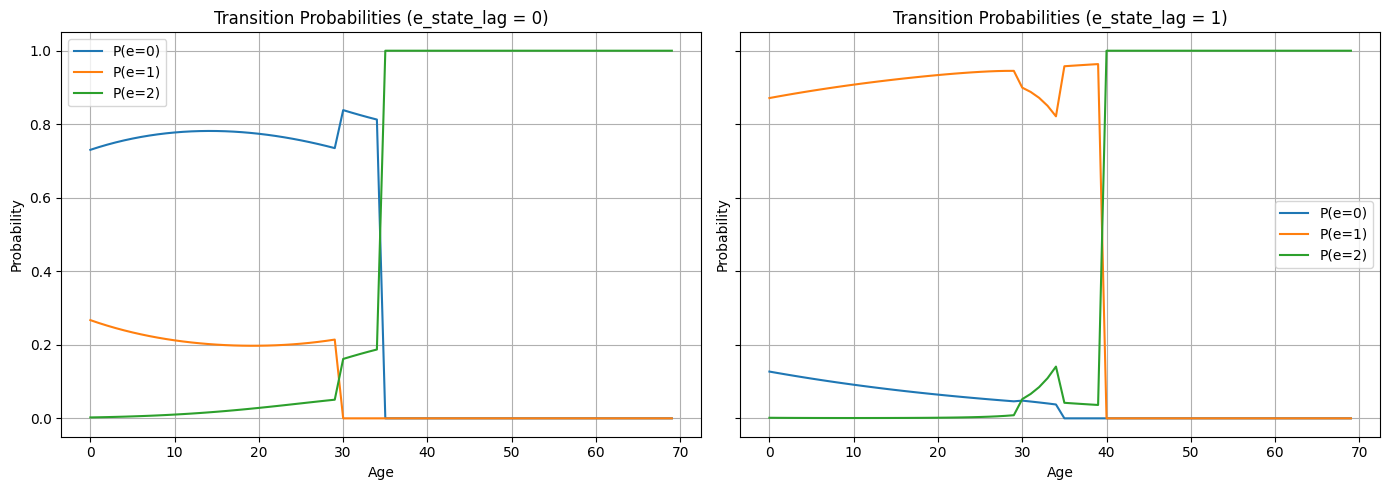

In [2]:


# Age range
age_end = 41
ages = np.arange(0, 70)

# DataFrame to collect results
results = []

# Compute for e_state_lag = 0 and 1
for e_state_lag in [0, 1]:
    for age in ages:
        x_input = {
            "e_state_lag": e_state_lag,
            "alder": age,
            "alder2": age**2,
            "dummy_60_65": int(age_end-11 <= age ),
            "alder*e_state_lag": age * e_state_lag,
            "alder2*e_state_lag": (age**2) * e_state_lag,
            "dummy_60_*e_state_la": int(age_end-11 <= age) * e_state_lag
        }
        # 👉 Force P(e=2) = 0 at age 35
        probs = compute_transition_probs(x_input, parameter_table_with_control)

        if e_state_lag == 0:
            if age >= 35:
                # Must go on early retirement
                probs[0] = 0.0
                probs[1] = 0.0
                probs[2] = 1.0
            elif age >= 30:
                # Cannot be hired
                probs[1] = 0.0
                total = probs[0] + probs[2]
                probs[0] /= total
                probs[2] /= total

        elif e_state_lag == 1:
            if age>= 40:
                probs[0] = 0.0
                probs[1] = 0.0
                probs[2] = 1.0
            elif age >= 35:
                # Move all P(e=1) mass to P(e=2)
                probs[2] = probs[0]
                probs[0] = 0.0
                total = probs[1] + probs[2]
                probs[1] /= total
                probs[2] /= total

        results.append({
            "age": age,
            "e_state_lag": e_state_lag,
            "P_0": probs[0],
            "P_1": probs[1],
            "P_2": probs[2]
        })


# Convert to DataFrame
df = pd.DataFrame(results)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
for lag, ax in zip([0, 1], axes):
    sub_df = df[df["e_state_lag"] == lag]
    ax.plot(sub_df["age"], sub_df["P_0"], label="P(e=0)")
    ax.plot(sub_df["age"], sub_df["P_1"], label="P(e=1)")
    ax.plot(sub_df["age"], sub_df["P_2"], label="P(e=2)")
    ax.set_title(f"Transition Probabilities (e_state_lag = {lag})")
    ax.set_xlabel("Age")
    ax.set_ylabel("Probability")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.savefig("andet/pictures/transition_probs_with_controls.png")  # Or .jpg, .svg, etc.
plt.show()
